XGBoost (eXtreme Gradient Boosting)
https://xgboost.readthedocs.io/en/stable/

- 일반 gbm보다 빠름

- 자체 과적합 규체 기능이 탑재됨

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
import matplotlib.pyplot as plt

In [4]:
xgb.__version__

'1.7.6'

In [6]:
# 데이터 준비
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

In [7]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
# 데이터 준비
# 들어가는 데이터 형태가 달라서 준비를 다시 해야 함
# DMatrix로 감싸서 사용함 
# (y : 종속변수, 라벨, 타겟 등 다양하게 표현)

dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [9]:
"""
max_depth : 트리의 최대 깊이 (질문 수)
eta : learning_rate
objective : 설정
 - reg : linear (회귀)
 - binary : logistic(이진분류)
 - multi : softmax (다항분류 - 클래스)
 - multi : softprop (다항분류 - 확률)
"""
params = {"max_depth" : 3, 
          "eta" : 0.1, 
          "objective": "binary:logistic", 
          "eval_metric":"error"}

num_round = 400

In [10]:
data_list = [(dtrain, "train"), (dtest, "eval")]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round, evals=data_list)

[0]	train-error:0.03297	eval-error:0.07895
[1]	train-error:0.03297	eval-error:0.07895
[2]	train-error:0.03297	eval-error:0.07895
[3]	train-error:0.02198	eval-error:0.07018
[4]	train-error:0.02198	eval-error:0.07018
[5]	train-error:0.02198	eval-error:0.07018
[6]	train-error:0.02198	eval-error:0.07018
[7]	train-error:0.02198	eval-error:0.07018
[8]	train-error:0.01758	eval-error:0.06140
[9]	train-error:0.01538	eval-error:0.06140
[10]	train-error:0.01758	eval-error:0.06140
[11]	train-error:0.01538	eval-error:0.05263
[12]	train-error:0.01319	eval-error:0.05263
[13]	train-error:0.01099	eval-error:0.04386
[14]	train-error:0.01099	eval-error:0.04386
[15]	train-error:0.00659	eval-error:0.04386
[16]	train-error:0.00659	eval-error:0.04386
[17]	train-error:0.00659	eval-error:0.04386
[18]	train-error:0.00440	eval-error:0.04386
[19]	train-error:0.00440	eval-error:0.03509
[20]	train-error:0.00220	eval-error:0.03509
[21]	train-error:0.00220	eval-error:0.03509
[22]	train-error:0.00220	eval-error:0.0350

In [11]:
predict = xgb_model.predict(dtest)
predict

array([8.59746099e-01, 1.98490638e-02, 9.99837041e-01, 2.19786051e-03,
       5.81588686e-01, 2.52984581e-04, 1.14375621e-01, 1.30466633e-02,
       9.96654630e-01, 9.98860955e-01, 9.96832192e-01, 1.09202613e-03,
       2.44256062e-03, 9.98305082e-01, 9.80883539e-01, 9.86850679e-01,
       9.99829531e-01, 9.99639153e-01, 9.85466719e-01, 9.58238845e-04,
       9.99283731e-01, 9.99826014e-01, 1.88977385e-04, 9.99414563e-01,
       5.13827894e-04, 9.95507479e-01, 9.74989951e-01, 1.51788088e-04,
       1.50439402e-04, 2.30877787e-01, 1.28519052e-04, 9.99762118e-01,
       1.09281696e-04, 1.19521888e-03, 9.97486711e-01, 9.99503732e-01,
       3.33799943e-02, 9.95139480e-01, 7.08145797e-01, 9.99625802e-01,
       9.99682546e-01, 9.98185217e-01, 9.86185491e-01, 9.99855042e-01,
       9.99710262e-01, 8.28586635e-04, 9.97217178e-01, 9.99718606e-01,
       9.96590734e-01, 1.05813384e-01, 3.57304467e-04, 1.18408063e-02,
       9.98974681e-01, 9.99800742e-01, 9.86478508e-01, 9.99830365e-01,
      

In [12]:
predict_list = [1 if x > 0.5 else 0 for x in predict]
predict_list

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

In [13]:
accuracy_score(y_test, predict_list)

0.956140350877193

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

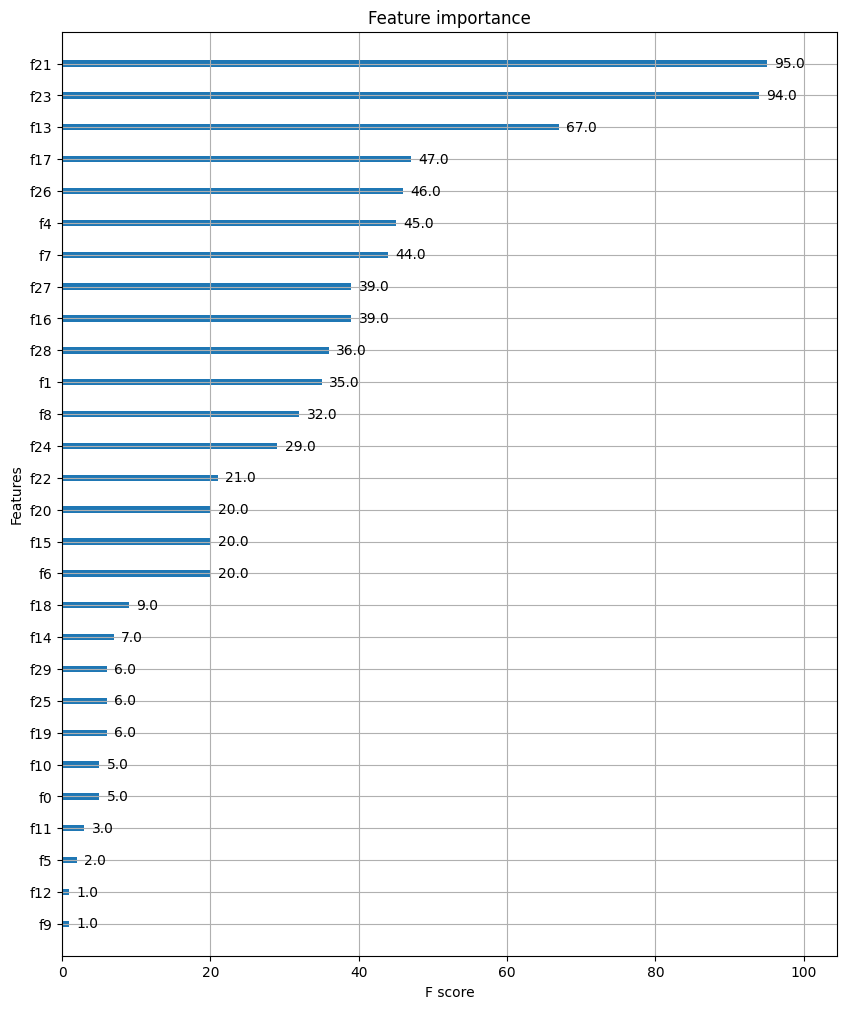

In [15]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# f+숫자 (feature index)